In [376]:
#Importing important Libraries
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import cv2
from cv2_plt_imshow import cv2_plt_imshow, plt_format

(200, 301, 3)


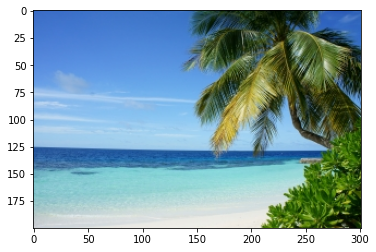

In [377]:
#The original image resized to a smaller size for faster computations
image = cv2.imread("image_resize.jpg")
cv2_plt_imshow(image)
print(image.shape)

In [378]:
#Function to calculate the distance between mean and pixel
def distance(mean, pixel):
    distance = 0
    for i in range(len(pixel)):
        distance += (mean[i] - pixel[i])**2
    return math.sqrt(distance)                  

In [379]:
#Function for generating random means to start the clustering
#Unique Random indices are generated to take random pixels from the image
def compute_random_means(image, k):
    r = []
    x=0
    index = []
    means = []
    while x<k:
        i = random.randrange(len(image))
        j = random.randrange(len(image[0]))
        if ([i,j] not in r):
            r.append([i,j])
            x+=1
    for i in range(len(r)):
        means.append(image[r[i][0]][r[i][1]])
    return list(means)

In [380]:
#Function for generating means from the clusters formed
def compute_mean(means, clusters, image):
    means = np.zeros((len(clusters),3))
    for k in range(len(clusters)):
        for i in range(len(clusters[k])):
            means[k][0] += image[clusters[k][i][0]][clusters[k][i][1]][0]
            means[k][1] += image[clusters[k][i][0]][clusters[k][i][1]][1]
            means[k][2] += image[clusters[k][i][0]][clusters[k][i][1]][2]
            
        if means[k][0] != 0: means[k][0]/=len(clusters[k])
        if means[k][1] != 0: means[k][1]/=len(clusters[k])
        if means[k][2] != 0: means[k][2]/=len(clusters[k])
    return means

In [381]:
#Function to form clusters with the help of given mean values
def form_clusters(clusters, image, mean):
    for i in range(len(image)):
        for j in range(len(image[0])):
            d = []
            for k in range(len(mean)):
                d.append(distance(mean[k],image[i][j]))
            clusters[d.index(min(d))].append([i,j])
    return clusters

In [382]:
'''Function for applying k means clustering
The clustering runs for 30 iterations and stops if the new means generated is equal to the old means in order
to stop unnecessary computations'''
def k_means_clusterring(image, K):
    clusters = []
    means = compute_random_means(image,K)
    flag = 0
    i = 0
    for i in range(30):
        clusters = []
        for j in range(K):
            clusters.append([]) 
        clusters = form_clusters(clusters, image, means)
        new_means = compute_mean(means,clusters, image)
        if (np.array_equal(new_means,means)):
            flag = 1
            break
        means = new_means
    print("K-",K,"Number of iterations-",i+1)
    print(means)
    return clusters,means

In [383]:
#Function for transforming the image with the colors equal to the mean values, to show different clusters
def show_image(clusters,image,colors):
    for k in range(len(clusters)):
        for i in range(len(clusters[k])):
            image[clusters[k][i][0]][clusters[k][i][1]] = colors[k]
    return image

c:\users\adi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


K- 2 Number of iterations- 13
[[214.1264712  180.91318613 135.11483179]
 [ 58.00215636  84.74876124  57.4649477 ]]


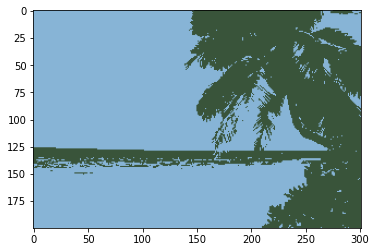

K- 3 Number of iterations- 19
[[218.76320341 205.33160372 164.36921282]
 [191.5762655  127.98323835  74.09822327]
 [ 35.54979646  80.24660283  58.99105556]]


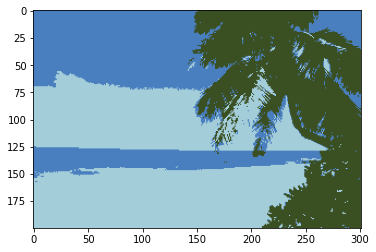

K- 4 Number of iterations- 30
[[ 23.30120682  62.09646275  40.0556804 ]
 [ 75.00873959 129.09367745 111.4689335 ]
 [222.80219826 206.31433449 163.89291811]
 [196.33016683 127.53476222  71.68295434]]


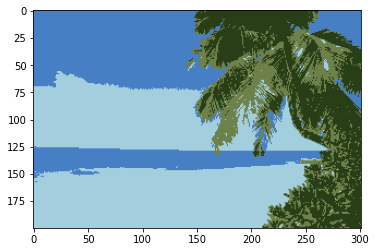

K- 5 Number of iterations- 24
[[ 73.72232444 133.6933456  117.73919043]
 [154.85939788 102.46493084  49.36924329]
 [213.75829046 141.99810051  85.91428571]
 [223.00873458 207.98595444 166.26440767]
 [ 22.57168799  62.78902187  40.99529509]]


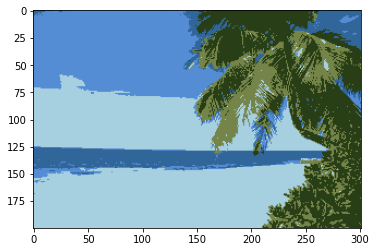

K- 6 Number of iterations- 28
[[214.67589893 142.27218983  85.87633625]
 [156.97005604 103.59695757  50.30408327]
 [100.25803624 158.56954997 149.88398597]
 [ 46.67748803 102.28552422  78.13304949]
 [224.35752544 208.31400643 166.04454562]
 [ 16.45674531  49.94119782  29.84791289]]


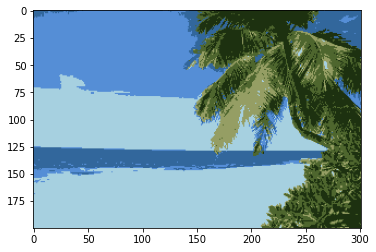

In [384]:
#K_means_clusterring for k = 2,3,4,5,6
#It shows a warning, but runs for all values of k(takes time)
#Please change the path of the file image_resize according to your pc
for i in range(2,7):
    image = cv2.imread("image_resize.jpg")
    clusters,means = k_means_clusterring(image,i)
    cv2_plt_imshow(show_image(clusters,image,means))
    plt.show()